<a href="https://colab.research.google.com/github/fathiUsman/Prediction-on-Student-Performance-depending-on-study-hours-using-supervised-Machine-Learning/blob/main/Prediction_Study_Performance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Done By: Fathima Usman**

# **The Sparks Foundation**

# **Task1: Using Supervised Machine Learning-Prediction of Students Performance depending on the Study hours**

**Importing all the libraries required.**

In [ ]:
#Importing all the libraries required.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn
%matplotlib inline

# **DATA COLLECTION**

***Importing the data file  ***

In [ ]:
url = "http://bit.ly/w-data"
data= pd.read_csv(url)
print("Data imported successfully")




Data imported successfully


In [ ]:
# to view the first 10 data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**To check the size of the dataframe**

In [ ]:
# to view the last 10 data
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#to find the size of the dataframe
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
type(data)

pandas.core.frame.DataFrame

**Find the Maximum and Minimum Observations from the Data**

In [ ]:
print(data['Hours'].max())
print(data['Scores'].max())

9.2
95


In [ ]:
print(data['Hours'].min())
print(data['Scores'].min())

1.1
17


In [ ]:
# check if any students scored less marks even after spending more time on studying
data[(data['Hours'] > 8) & (data['Scores'] < 80)]

,Hours,Scores
3,8.5,75


# **DATA VISUALIZATION**

**Let's plot our data points on 2-D graph to see if we can manually find any relationship between the data.**

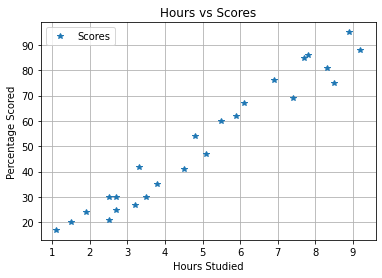

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',style='*')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**The students who has spent more time on studying has scored higher percentage.**

**Preparing the data:**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
x = data['Hours'].values.reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y= data['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [ ]:
#Train_Test_Split of Data using sklearn

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10,test_size = 0.2)

In [ ]:
x_train

array([[7.4],
       [1.1],
       [5.5],
       [5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [ ]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5]])

In [ ]:
y_train

array([69, 17, 60, 62, 35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21,
       95, 30, 25])

In [ ]:
y_test

array([20, 47, 42, 27, 41])

**Prediction and Visualization For Trained Data**

**Training the Algorithm**

In [ ]:
#Importing Linear Regression From linear_model

from sklearn.linear_model import LinearRegression  

In [ ]:
#We have to split our data into training and testing sets and train our algorithm
train_regressor = LinearRegression()  


In [ ]:
train_regressor.fit(x_train, y_train) 

print("Training Successful.")

Training Successful.


In [ ]:
print(train_regressor.coef_)
print(train_regressor.intercept_)

[9.81430544]
2.649965189403865


In [ ]:
train_prediction = train_regressor.predict(x_train)

In [ ]:
train_prediction

array([75.27582547, 13.44570118, 56.62864513, 60.5543673 , 39.94432587,
       86.07156145, 70.36867275, 92.94157527, 62.51722839, 78.2201171 ,
       49.75863132, 79.20154764, 84.10870037, 29.14858989, 27.1857288 ,
       21.29714553, 27.1857288 , 89.99728363, 37.00003424, 29.14858989])

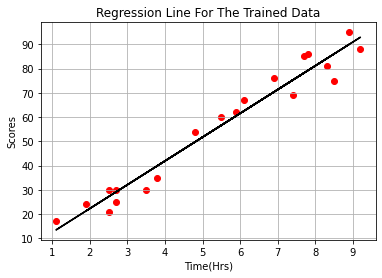

In [ ]:
# Plotting the regression line
plt.scatter(x_train,y_train,color= 'r',marker = 'o')
plt.plot(x_train,train_prediction,color='black')
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores',)
plt.title('Regression Line For The Trained Data')
plt.grid()
plt.show()

**Regression Prediction and Visualization For The Tested Data**

In [ ]:
test_regressor = LinearRegression()

In [ ]:
test_regressor.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_prediction = test_regressor.predict(x_test)

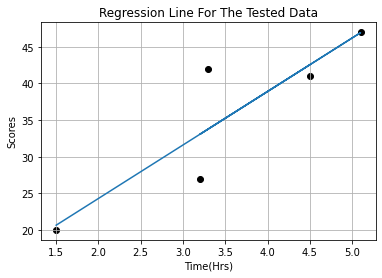

In [ ]:
plt.scatter(x_test,y_test,color= 'black',marker = 'o')
plt.plot(x_test,test_prediction)
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores')
plt.title('Regression Line For The Tested Data')
plt.grid()
plt.show()

**Actual vs Predicted Data**

In [ ]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_train, 'Predicted': train_prediction})  
df 

,Actual,Predicted
0,69,75.275825
1,17,13.445701
2,60,56.628645
3,62,60.554367
4,35,39.944326
5,75,86.071561
6,76,70.368673
7,88,92.941575
8,67,62.517228
9,85,78.220117


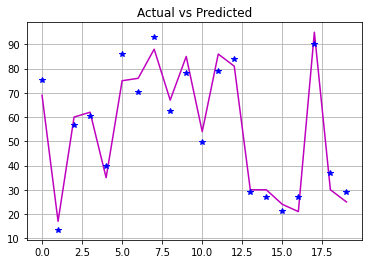

In [ ]:
plt.plot(df['Actual'],'m')
plt.plot(df['Predicted'],'b*')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

In [ ]:
#R-Squared value for Accuracy of Learning to the Machine (For Trained Data)
Train_R_Squared_value = train_regressor.score(x_train,y_train)
Train_R_Squared_value

0.9580702244504199

In [ ]:
# R-Squared value for Accuracy of Learning to the Machine (For Tested Data)
Test_R_Squared_value = test_regressor.score(x_test,y_test)
Test_R_Squared_value

0.793199272799264

**Regression For Original Data**

In [ ]:
# regression for normal data
o_regressor = LinearRegression()

In [ ]:
o_regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
o_prediction = o_regressor.predict(x)
o_prediction

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

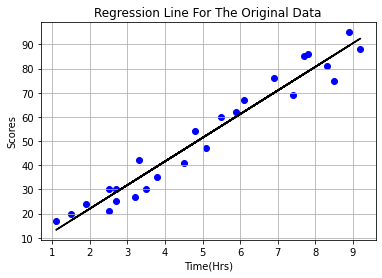

In [ ]:
plt.scatter(x,y,color= 'blue',marker = 'o')
plt.plot(x,o_prediction,color='black')
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores',)
plt.title('Regression Line For The Original Data')
plt.grid()
plt.show()

In [ ]:
o_R_squared_value = o_regressor.score(x,y)
o_R_squared_value

0.9529481969048356

**What will the be predicted score if a student studies for 9.25 hrs/ day?**

Y = B0 + B1*X formula for predicting for the value 

In [ ]:
p_score = o_regressor.predict([[9.25]])
p_score

array([92.90985477])

**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, test_prediction)) 

Mean Absolute Error: 3.30613943808533


  # **THANK YOU**